In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.datasets import make_classification
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Dropout,BatchNormalization,Activation
from tensorflow.keras.optimizers import Adam,SGD,RMSprop
from tensorflow.keras.callbacks import EarlyStopping


In [3]:
x,y = make_classification(
    n_samples =1000,n_features = 20,n_informative =15,
    n_redundant = 5,n_classes =4,random_state =42)


In [7]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [8]:
# Scale the features using StandardScaler

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [9]:
# One-hot encode the target variable(because of multi class)

encoder = OneHotEncoder(sparse = False)
y_train = encoder.fit_transform(y_train.reshape(-1,1))
y_test = encoder.fit_transform(y_test.reshape(-1,1))

# if you have an array with 12 elements and you use reshape(-1, 1), NumPy will infer that there should be 12 rows and 1 column.
# The -1 in the reshape function acts as a placeholder for an unknown dimension.

In [11]:
model = Sequential()

# Input Layer
model.add(Dense(128,input_shape =(x_train.shape[1],)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.3))

# Second Hidden Layer
model.add(Dense(64))
model.add(BatchNormalization())
model.add(Activation('tanh'))
model.add(Dropout(0.3))

#Third Hidden Layer
model.add(Dense(32))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.2))

# Output Layer
model.add(Dense(y_train.shape[1],activation = 'softmax')) 

optimizer = Adam(learning_rate = 0.001)
# optimizer = SGD(learning_rate = 0.01,momentum =0.9)
# optimizer = RMSprop(learning_rate = 0.001)

model.compile(optimizer = optimizer,loss = 'categorical_crossentropy',metrics = ['accuracy'])


In [13]:
early_stopping = EarlyStopping(
    monitor = 'val_loss',
    patience = 10,   # stop after 10 epochs of no improvement
    restore_best_weights = True)   #Restore weights from the epoch with the best validation loss

In [14]:
# Train the model

history = model.fit(x_train,y_train,validation_data = (x_test,y_test),epochs =100,
                    batch_size = 32,callbacks = [early_stopping],verbose =1)

Epoch 1/100
22/22 [==============================] - 3s 20ms/step - loss: 1.5428 - accuracy: 0.2743 - val_loss: 1.2341 - val_accuracy: 0.4933
Epoch 2/100
22/22 [==============================] - 0s 6ms/step - loss: 1.2246 - accuracy: 0.4400 - val_loss: 1.1223 - val_accuracy: 0.5500
Epoch 3/100
22/22 [==============================] - 0s 6ms/step - loss: 1.1258 - accuracy: 0.5114 - val_loss: 1.0476 - val_accuracy: 0.6033
Epoch 4/100
22/22 [==============================] - 0s 6ms/step - loss: 1.0282 - accuracy: 0.5629 - val_loss: 0.9949 - val_accuracy: 0.6333
Epoch 5/100
22/22 [==============================] - 0s 6ms/step - loss: 0.9797 - accuracy: 0.5943 - val_loss: 0.9504 - val_accuracy: 0.6367
Epoch 6/100
22/22 [==============================] - 0s 7ms/step - loss: 0.9496 - accuracy: 0.6000 - val_loss: 0.9133 - val_accuracy: 0.6367
Epoch 7/100
22/22 [==============================] - 0s 7ms/step - loss: 0.8321 - accuracy: 0.6629 - val_loss: 0.8896 - val_accuracy: 0.6533
Epoch 8/100


In [15]:
# Evaluate the model

test_loss,test_accuracy = model.evaluate(x_test,y_test)
print(f"Test Loss:{test_loss:.4f},Test Accuracy : {test_accuracy:.4f}")


10/10 [==============================] - 0s 2ms/step - loss: 0.5811 - accuracy: 0.7900
Test Loss:0.5811,Test Accuracy : 0.7900


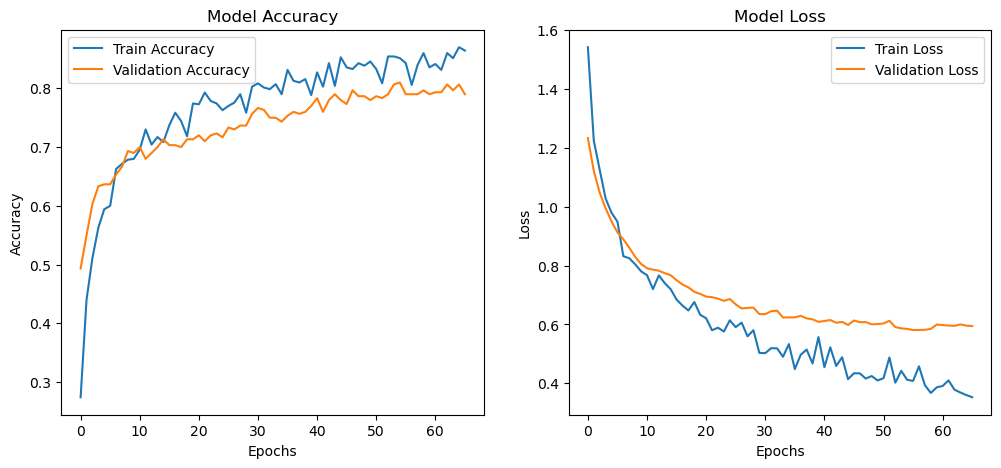

In [17]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


##  Predict New Samples

In [19]:
sample_index = 0
sample_input = x_test[sample_index].reshape(1,-1)
predicted_class = np.argmax(model.predict(sample_input))
true_class = np.argmax(y_test[sample_index])

print(f"Predicted Class: {predicted_class}, True Class: {true_class}")

1/1 [==============================] - 0s 155ms/step
Predicted Class: 1, True Class: 1
